# RANSAC



## Import Modules

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math
import scipy.signal
import scipy.linalg
import mae6292.tools as mae6292
import importlib

from mae6292.imshow import cv2_imshow

## Polynomial Fitting


We apply RANSAC to a simple problem.


### Generate Data
For a given second order polynomial $y=\rho(x) = a_0x^2 + a_1x+a_2$, we generate 30 data poinst $(x_i,y_i)$, among which 20 are inliners and 10 are outliers, i.e., $w = 2/3$. More specifically, 

* Inlier: $x_i$ is sampled over the range $[-0.5-a_1/2a_0, 0.5-a_1/2a_0]$, and for each $x_i$, $y_i$ sampled from $\rho(x_i)$ with an additive noise. 
* Outlier: $x_i$ is sampled over the same range. Let the maximum noise be $0.1*(y_{\max}-y_{\min})$. $y_i$ is sampled over $\texttt{max\_noise}[-0.5, 0.5]+y_{\min}$

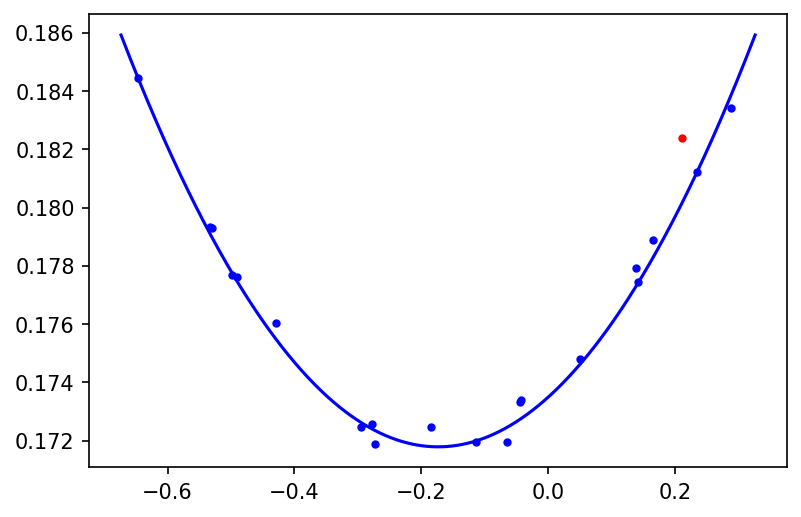

In [15]:
N_inliers = 20
N_outliers = 20 
a = np.random.rand(3,1)
x_true = np.linspace(-0.5-a[1]/2/a[0], 0.5-a[1]/2/a[0], 1001)
y_true = np.polyval(a,x_true)

# inliers
x = np.random.uniform(-0.5-a[1]/2/a[0], 0.5-a[1]/2/a[0], N_inliers)
y_range = (np.max(y_true)-np.min(y_true))
max_noise = y_range * 0.1
y = np.polyval(a,x)+np.random.uniform(-0.5*max_noise, 0.5*max_noise, N_inliers)

# outlines
x_outliers = np.random.uniform(-0.5-a[1]/2/a[0], 0.5-a[1]/2/a[0], N_outliers)
y_outliers = np.random.uniform(-0.1*y_range, 1.1*y_range, N_outliers)+np.min(y_true)

plt.figure(dpi=150)
plt.plot(x_true,y_true,'b')
plt.plot(x,y,'b.')
plt.plot(x_outliers,y_outliers,'r.')

x_data = np.concatenate((x,x_outliers))
y_data = np.concatenate((y,y_outliers))
N_data = N_inliers+N_outliers

### RANSAC

0. Set `N_inliers_max = 0`
1.  Randomly select $s=3$ points using [np.random.choice(..., ..., replace=False)](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html) It is important that no points are repeated, as we need three *distinct* points.
2.  Fit the 3 points using [np.polyfit()](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html)
3.  Compute the residual using the polynomial for each data point, using [np.polyval()](https://numpy.org/doc/stable/reference/generated/numpy.polyval.html)
It is declaired as inliners if the residual is less than $\texttt{max\_noise}$. Count `N_inliers`
4.  If `N_inliers > N_inliers_max`, save the current polynomial and plot.
5.  Repeat the above 1-4.

i_iter= 0  N_inliers_max= 9
i_iter= 1  N_inliers_max= 10
i_iter= 3  N_inliers_max= 20


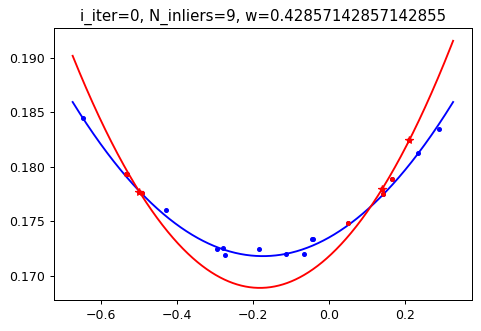

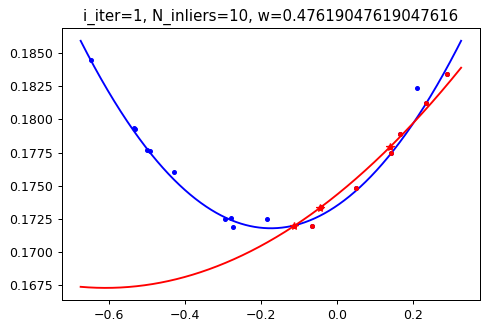

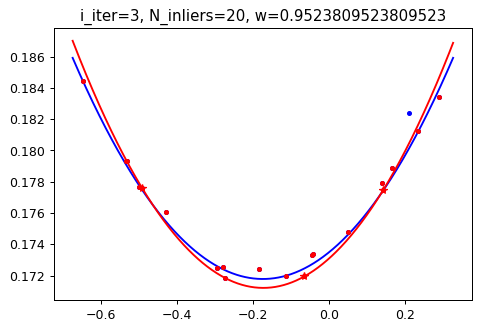

In [16]:
N_inliers_max = 0
N_iter = 1000
display_iter = True

for i_iter in range(N_iter):

    # 1. randomly select s=3 points with "replace=False"!!
    i_sample = np.random.choice(range(N_data), 3, replace=False)

    # 2. fit the selected point 
    p = np.polyfit(x_data[i_sample],y_data[i_sample], 2)
    y_est = np.polyval(p, x_data)

    # 3. identify inliers
    i_inliers = np.where(abs(y_est-y_data) < max_noise)[0]

    # 4. save the best polynomial 
    if len(i_inliers) > N_inliers_max:
        p_best = p
        N_inliers_max = len(i_inliers)
        print('i_iter=',i_iter,' N_inliers_max=', N_inliers_max)

        if display_iter:
            plt.figure(dpi=90)
            plt.plot(x_data,y_data,'b.')
            plt.plot(x_true,y_true,'b')
            plt.plot(x_data[i_inliers],y_data[i_inliers],'r.')
            plt.plot(x_data[i_sample],y_data[i_sample],'r*')
            plt.plot(x_true, np.polyval(p_best, x_true), 'r')
            plt.title('i_iter='+str(i_iter)+', N_inliers='+str(N_inliers_max)+', w='+str(N_inliers_max/N_data))
            





In [12]:
np.random.choice(range(10), 3)

array([9, 8, 9])

In [11]:
np.random.choice(range(10), 3, replace=False)

array([9, 6, 7])